**Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud

**Load the dataset from a CSV file**

In [ ]:
df = pd.read_csv('/content/train.csv')

**Preprocess the data**

In [ ]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f"[{string.punctuation}]", " ", text)  # Remove punctuation
    text = re.sub("\d+", " ", text)  # Remove numbers
    text = re.sub("\s+", " ", text).strip()  # Remove extra spaces
    return text

df['sms'] = df['sms'].apply(preprocess_text)


**Display basic informations of the dataset**

In [ ]:
print("Dataset Information:")
print(df.info())
print("\nFirst 5 records:")
print(df.head())
print("\nLast 5 records:")
print(df.tail())
print(f"\nDataset Dimensions: {df.shape}")
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None

First 5 records:
                                                 sms  label
0  go until jurong point crazy available only in ...      0
1                            ok lar joking wif u oni      0
2  free entry in a wkly comp to win fa cup final ...      1
3        u dun say so early hor u c already then say      0
4  nah i don t think he goes to usf he lives arou...      0

Last 5 records:
                                                    sms  label
5569  this is the nd time we have tried contact u u ...      1
5570                will ü b going to esplanade fr home      0
5571  pity was in mood for that so any other suggest...      0
5572  the guy did some bit

**Count of spam vs. non-spam messages and display with Pie chart**



Label Counts:
label
0    4827
1     747
Name: count, dtype: int64


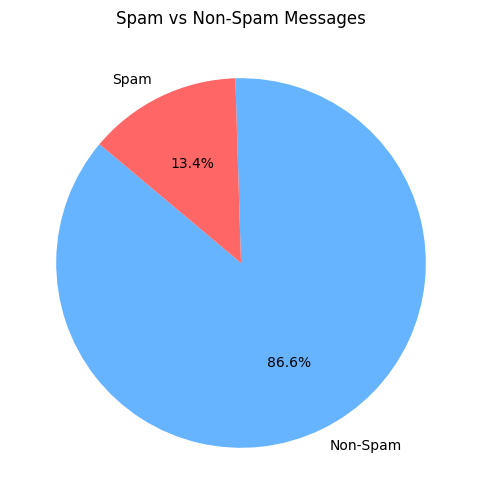

In [ ]:
label_counts = df['label'].value_counts()
print("\nLabel Counts:")
print(label_counts)

# Pie chart of spam vs. non-spam messages
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=['Non-Spam', 'Spam'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff6666'])
plt.title('Spam vs Non-Spam Messages')
plt.show()

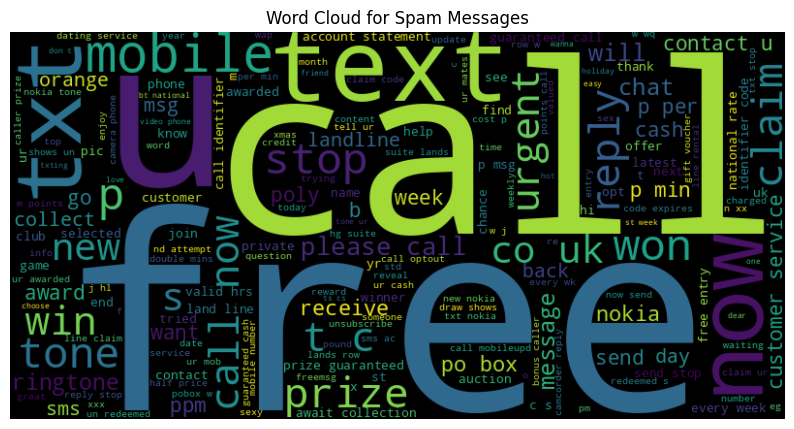

In [ ]:
# Word cloud for spam messages
spam_words = ' '.join(df[df['label'] == 1]['sms'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_words)

plt.figure(figsize=(10, 8))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

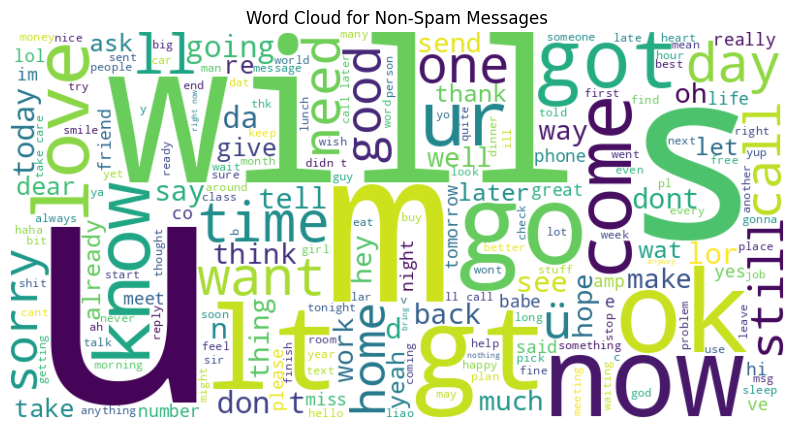

In [ ]:
# Word cloud for non-spam messages
non_spam_words = ' '.join(df[df['label'] == 0]['sms'])
non_spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_spam_words)

plt.figure(figsize=(10, 8))
plt.imshow(non_spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Spam Messages')
plt.show()

**Feature extraction**

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['sms'])

**Train-test split**

In [ ]:
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train the model**

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

**Evaluate the model**

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.9713004484304932

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       954
           1       1.00      0.80      0.89       161

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



**Confusion matrix**

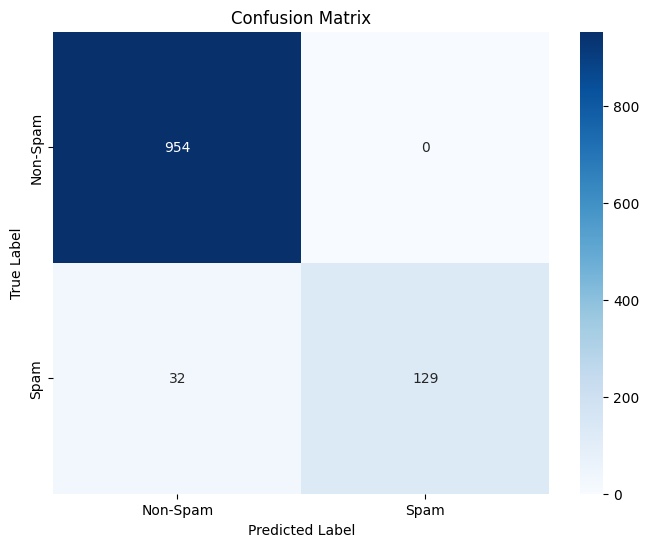

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Save the model**

In [ ]:
joblib.dump(model, 'sms_spam_classifier.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']